In [1]:
import pandas as pd 

In [4]:
path2data = 'C:\\Users\\J.Bustos\\Documents\\insurance.csv'

In [5]:
df = pd.read_csv(path2data)

In [6]:
df.shape

(1338, 7)

In [7]:
df.head() 

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [8]:
df.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [9]:
df.groupby('sex').bmi.count()

sex
female    662
male      676
Name: bmi, dtype: int64

In [12]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [36]:
#df.corr()

In [38]:
getBinaryMaleFamele = lambda text: 0 if text == 'female' else 1

In [39]:
getBinaryMaleFamele('male')

1

In [40]:
df['sexBinary'] = df.sex.apply(getBinaryMaleFamele)

In [20]:
df.groupby('region').sex.count()

region
northeast    324
northwest    325
southeast    364
southwest    325
Name: sex, dtype: int64

In [ ]:
df2 = df[['age', 'bmi', 'children', ]]

In [21]:
df.columns.tolist()

['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges', 'sexBinary']

In [28]:
df['regionsNumeric'] = df['region'].replace(['northeast', 'northwest', 'southeast', 'southwest'],
                        [0, 1, 2, 3])

C:\Users\J.Bustos\AppData\Local\Temp\ipykernel_3860\257497103.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['regionsNumeric'] = df['region'].replace(['northeast', 'northwest', 'southeast', 'southwest'],


In [29]:
#df3.groupby('region').sex.count()

In [ ]:
def changeRegions2Labels(nameRegions):
    if nameRegions == 'southwest':
        return 0
    elif nameRegions == 'southeast':
        return 1

In [30]:
df.groupby('regionsNumeric').sex.count()

regionsNumeric
0    324
1    325
2    364
3    325
Name: sex, dtype: int64

In [31]:
df.columns.tolist()

['age',
 'sex',
 'bmi',
 'children',
 'smoker',
 'region',
 'charges',
 'sexBinary',
 'regionsNumeric']

In [32]:
getSmokerBinary = lambda name: 1 if name == 'yes' else 0

In [33]:
df['binarySmoker'] = df.smoker.apply(getSmokerBinary)

In [34]:
df.columns.tolist()

['age',
 'sex',
 'bmi',
 'children',
 'smoker',
 'region',
 'charges',
 'sexBinary',
 'regionsNumeric',
 'binarySmoker']

In [41]:
df[['age', 'bmi', 'sexBinary', 'regionsNumeric', 'binarySmoker', 'charges']].corr()

,age,bmi,sexBinary,regionsNumeric,binarySmoker,charges
age,1.000000,0.109272,-0.020856,0.002127,-0.025019,0.299008
bmi,0.109272,1.000000,0.046371,0.157566,0.003750,0.198341
sexBinary,-0.020856,0.046371,1.000000,0.004588,0.076185,0.057292
regionsNumeric,0.002127,0.157566,0.004588,1.000000,-0.002181,-0.006208
binarySmoker,-0.025019,0.003750,0.076185,-0.002181,1.000000,0.787251
charges,0.299008,0.198341,0.057292,-0.006208,0.787251,1.000000


In [37]:
df.sexBinary.unique()

array([1])

In [42]:
import matplotlib.pyplot as plt 

Matplotlib is building the font cache; this may take a moment.


Text(0.5, 1.0, 'Ages Histogram')

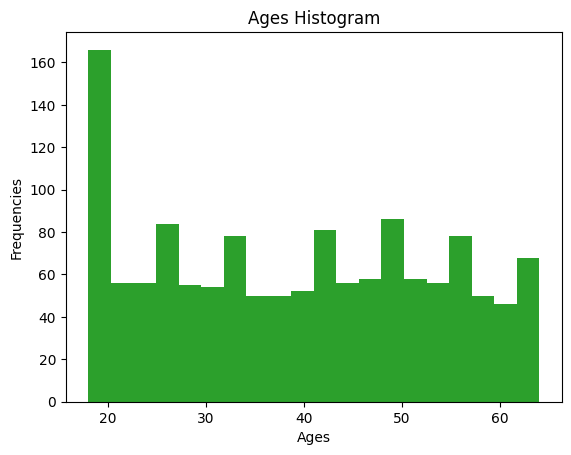

In [50]:
plt.hist(df.age.values, bins=20, color='tab:green')
plt.ylabel('Frequencies')
plt.xlabel('Ages')
plt.title('Ages Histogram')

In [48]:
!python -m pip install seaborn 

Defaulting to user installation because normal site-packages is not writeable


In [51]:
import seaborn as sns 

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             1338 non-null   int64  
 1   sex             1338 non-null   object 
 2   bmi             1338 non-null   float64
 3   children        1338 non-null   int64  
 4   smoker          1338 non-null   object 
 5   region          1338 non-null   object 
 6   charges         1338 non-null   float64
 7   sexBinary       1338 non-null   int64  
 8   regionsNumeric  1338 non-null   int64  
 9   binarySmoker    1338 non-null   int64  
dtypes: float64(2), int64(5), object(3)
memory usage: 104.7+ KB


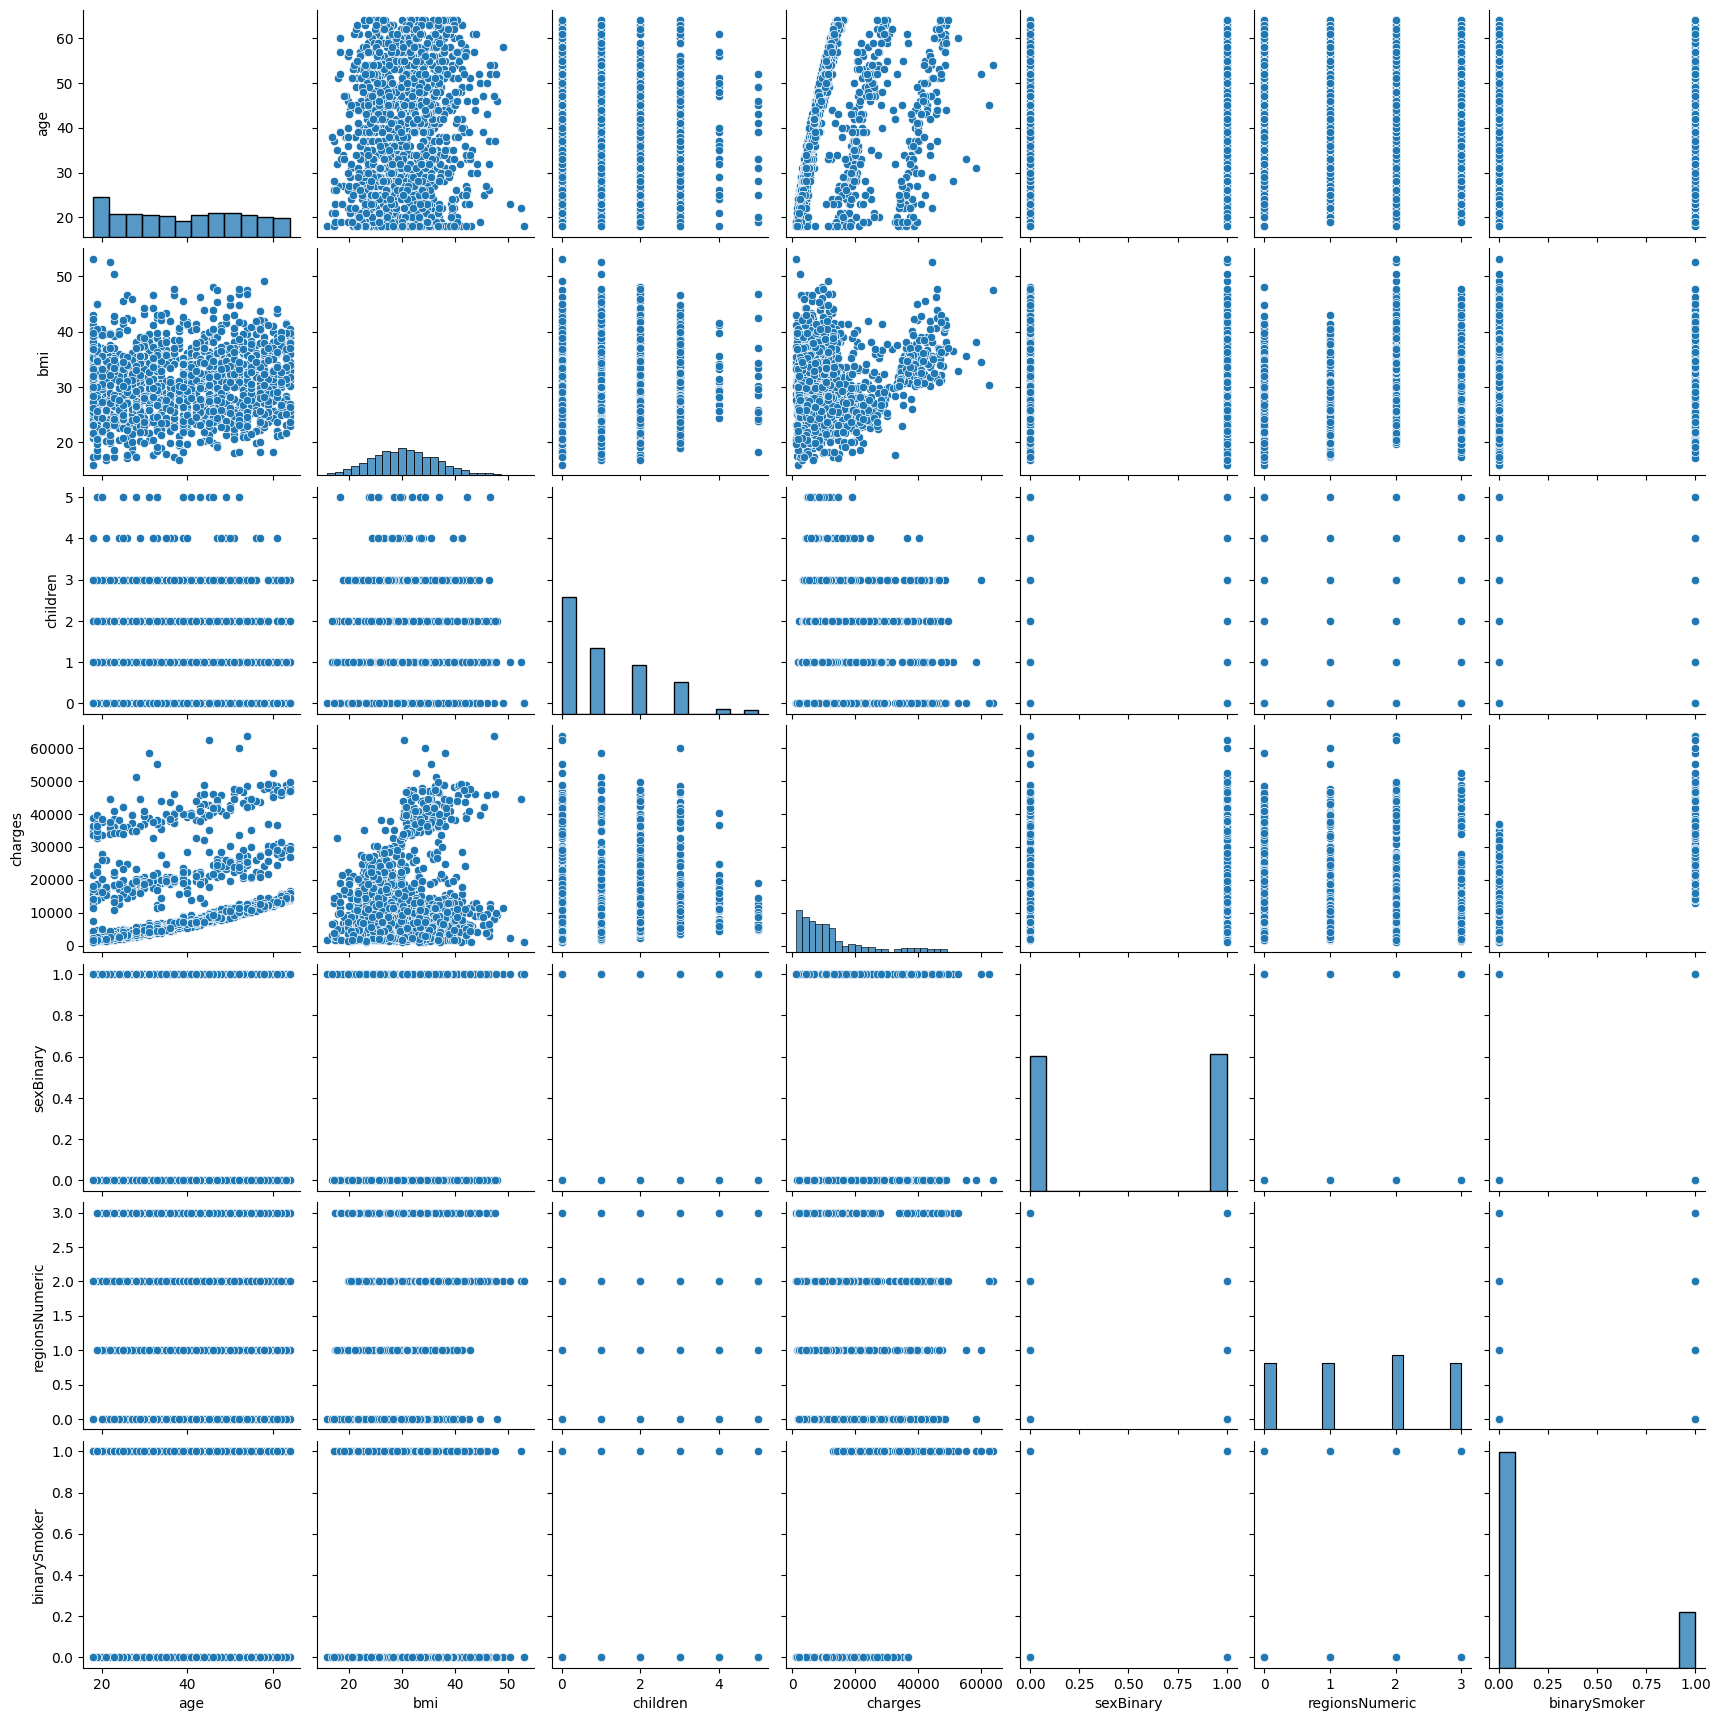

In [55]:
sns.pairplot(df)

In [56]:
charges = df.charges.values

In [64]:
chargesMale = df[df.sexBinary == 1].charges

In [65]:
chargesFemale = df[df.sexBinary == 0].charges

In [57]:
gender = df.sexBinary.values

In [63]:
type(gender)

numpy.ndarray

In [60]:
bmi = df.bmi.values

In [79]:
bmiFamale = df[df.binarySmoker == 0].bmi

In [80]:
bmiMale = df[df.binarySmoker == 1].bmi

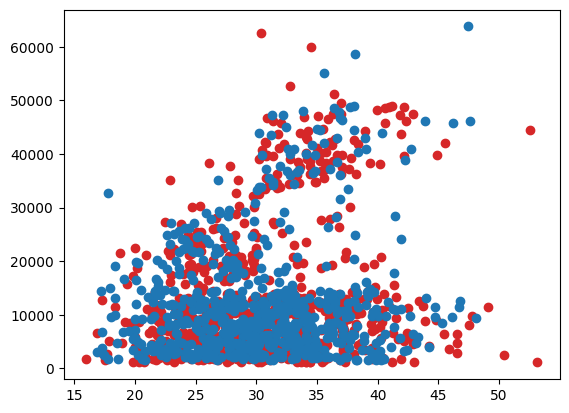

In [69]:
plt.scatter(bmiMale, chargesMale, color='tab:red')
plt.scatter(bmiFamale, chargesFemale, color='tab:blue')

In [82]:
ageF = df[df.binarySmoker == 0].age 

In [83]:
ageM = df[df.binarySmoker == 1].age 

In [85]:
#plt.scatter(ageF, chargesFemale, color='tab:red')
#plt.scatter(ageM, chargesMale, color='tab:blue')

In [89]:
bmiSmoker = df[df.binarySmoker == 1].bmi
bmiNonSmoker = df[df.binarySmoker == 0].bmi

In [90]:
chargesSmoker = df[df.binarySmoker == 1].charges
chargesNonSmoker = df[df.binarySmoker == 0].charges

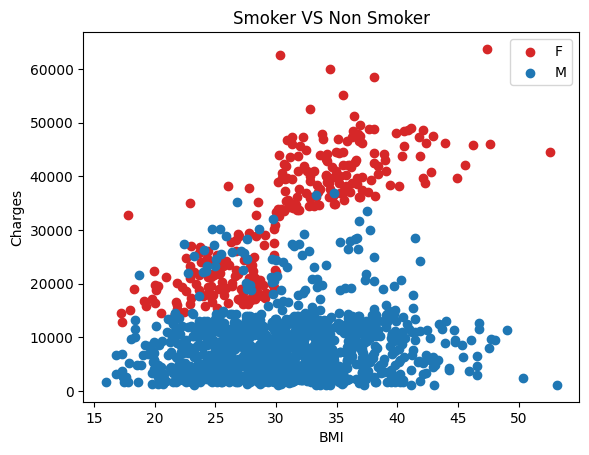

In [93]:
plt.scatter(bmiSmoker, chargesSmoker, color='tab:red')
plt.scatter(bmiNonSmoker, chargesNonSmoker, color='tab:blue')
plt.xlabel('BMI')
plt.ylabel('Charges')
plt.title('Smoker VS Non Smoker')
plt.legend(['F', 'M'])

In [94]:
import cv2

In [96]:
path2img = 'C:\\Users\\J.Bustos\\Documents\\istockphoto-1909717738-612x612.jpg'

In [105]:
cv2.imwrite('test.png',img[:,:,0] )

True

In [97]:
img = cv2.imread(path2img)

In [98]:
img.shape

(396, 612, 3)

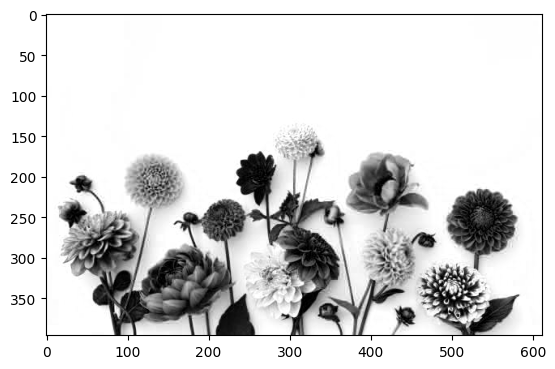

In [103]:
plt.imshow(img[:,:,0], cmap='gray')

(array([ 11456.,   9988.,   9106.,   7051.,   5992.,   5714.,   7240.,
          7901.,  13367., 164537.]),
 array([  0. ,  25.5,  51. ,  76.5, 102. , 127.5, 153. , 178.5, 204. ,
        229.5, 255. ]),
 <BarContainer object of 10 artists>)

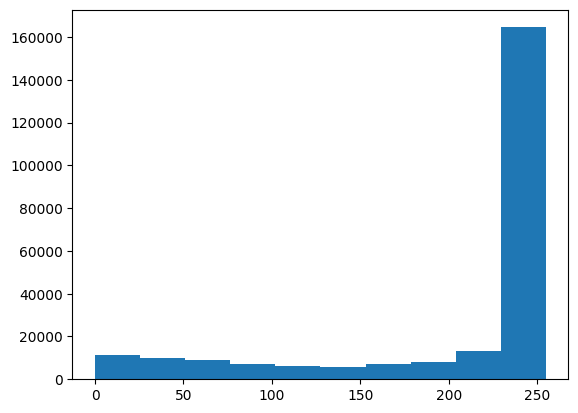

In [107]:
plt.hist(img[:, :, 0].reshape(-1,1))

In [109]:
import numpy as np 

In [117]:
id2mask = np.where(img[:, :, 0] < 155) 

In [118]:
mask = np.zeros((img.shape[0], img.shape[1]), dtype=np.uint8)

In [119]:
mask[id2mask] = 255

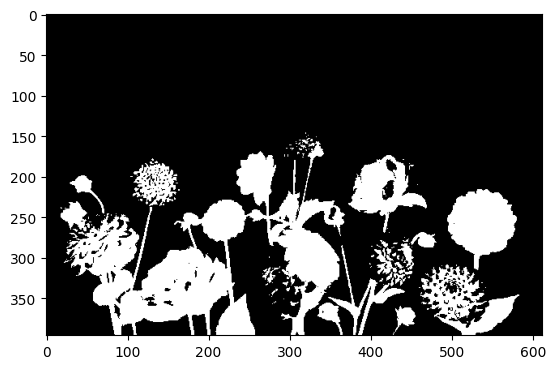

In [120]:
plt.imshow(mask, cmap='gray')

In [121]:
flowers = cv2.bitwise_and(img, img, mask=mask) 
# cv.bitwise_and(img2,img2,mask = mask)

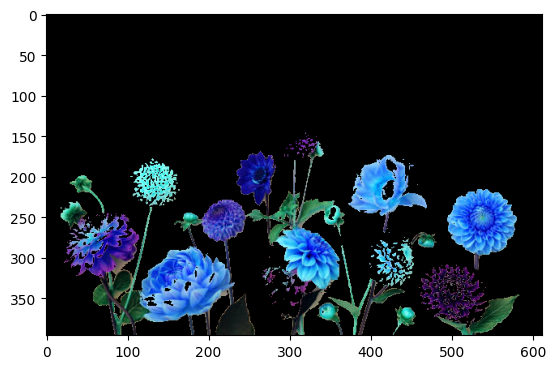

In [122]:
plt.imshow(flowers)

In [128]:
# Morphological operations 
kernel = np.ones((2,2),np.uint8)
dilation = cv2.dilate(mask,kernel,iterations = 4)

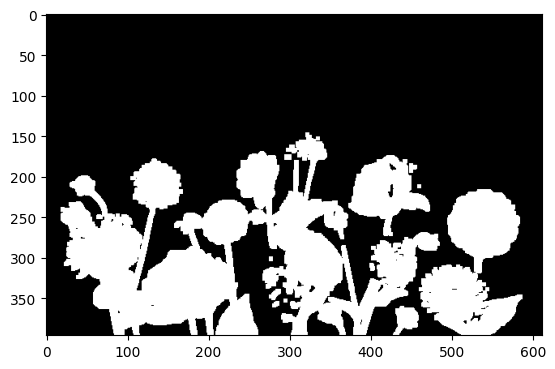

In [129]:
plt.imshow(dilation, cmap='gray')

In [130]:
flowers = cv2.bitwise_and(img, img, mask=dilation) 

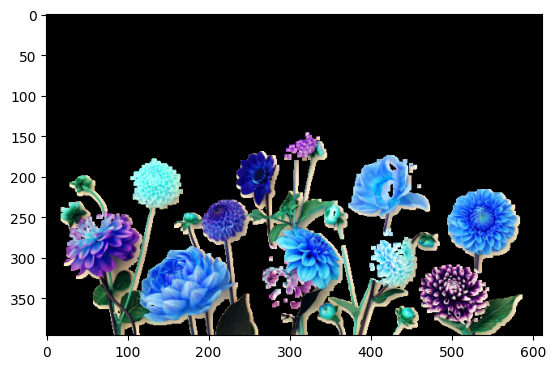

In [131]:
plt.imshow(flowers)

In [135]:
contours, hierarchy = cv2.findContours(dilation, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

In [140]:
imgContours = cv2.drawContours(img, contours, -1, (0,255,0), 3)

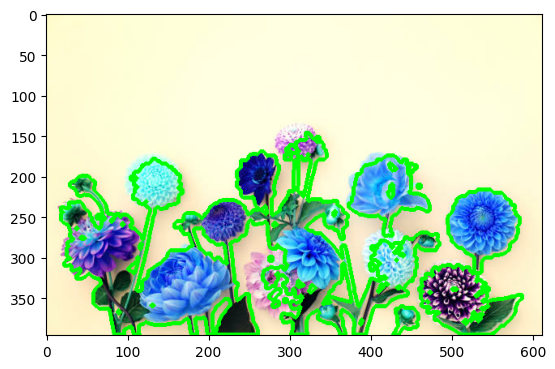

In [141]:
plt.imshow(imgContours)